## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Loading the dataset

In [ ]:
# if importing dataset from Google Drive
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [ ]:
path_to_folder = ''
#path_to_folder = [insert path to folder here, including the / at the end]

original_data = pd.read_csv(path_to_folder + 'Loan_Modelling.csv')
data = original_data.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.shape

(5000, 14)

In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

> Answers:

> 1: The distribution of mortgage is highly right-skewed, with customers having a mortgage of 0 or very close to 0 and a few customers have significant mortgage values.

> 2: All 5000 customers have credit cards, with 1470 of those having credit cards not issued by All Life Bank

> 3: The variables having the strongest correlations with Personal_Loan are Income (0.5), CCAvg (0.37), and CD_Account (0.32)

> 4: The customers' interests in purchasing a loan generally did not noticeably vary with their age (very slightly in the negative direction) except for the fact that that the lowest and highest ages in the dataset were not intersted in purchasing loans

> 5: A customer's interst in purchasing a loan is higher with level 2 or level 3 education than with level 1 education (accounting for the total size of the bars in the multi-colored bar chart)

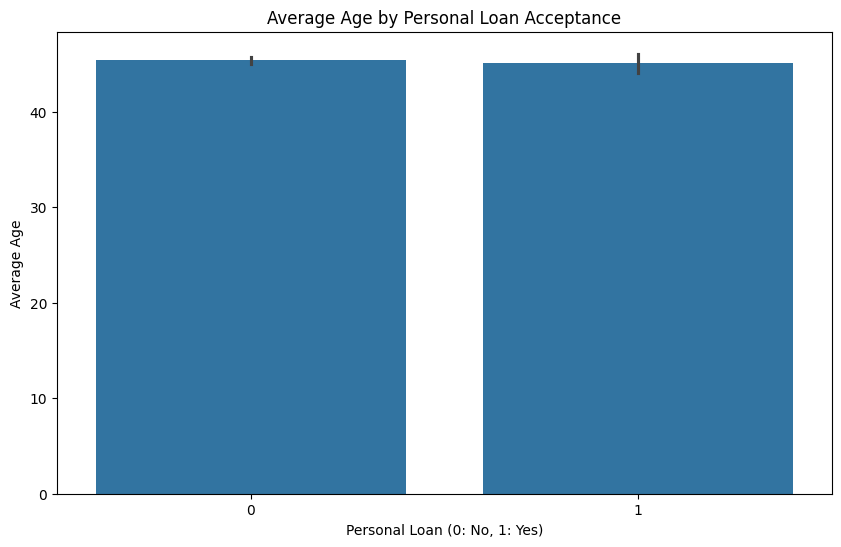

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Personal_Loan', y='Age', data=data)
plt.title('Average Age by Personal Loan Acceptance')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('Average Age')
plt.show()

In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns
print(f"numerical columns: {numerical_columns}")
print(f"categorical_columns: {categorical_columns}")

numerical columns: Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')
categorical_columns: Index([], dtype='object')


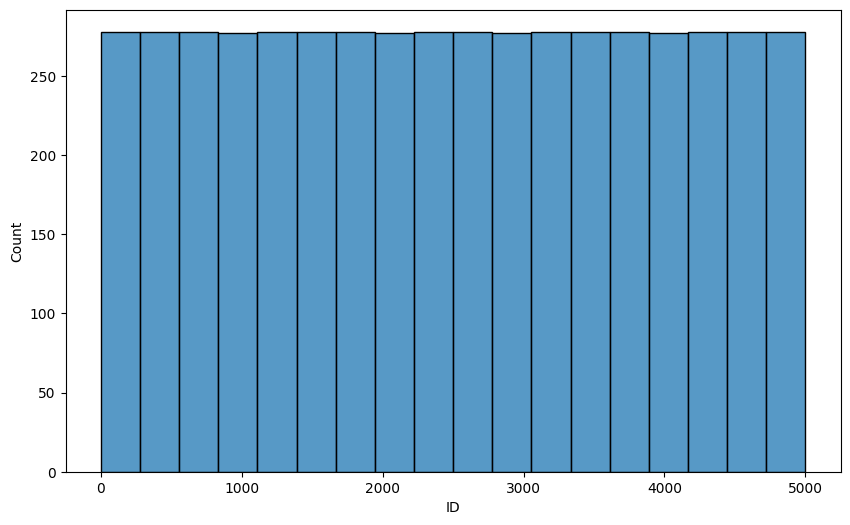

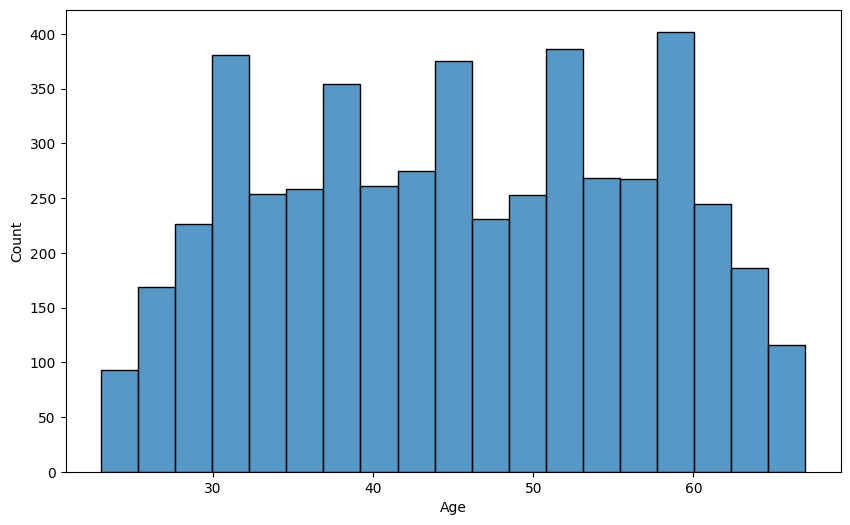

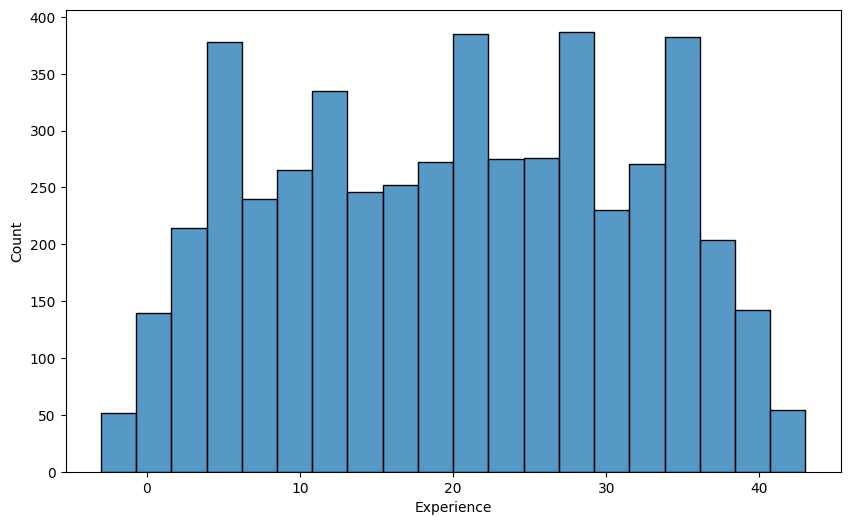

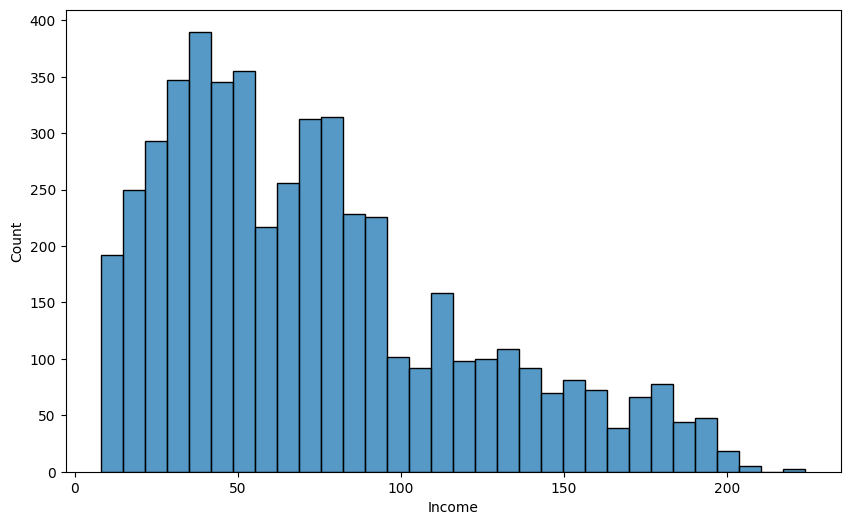

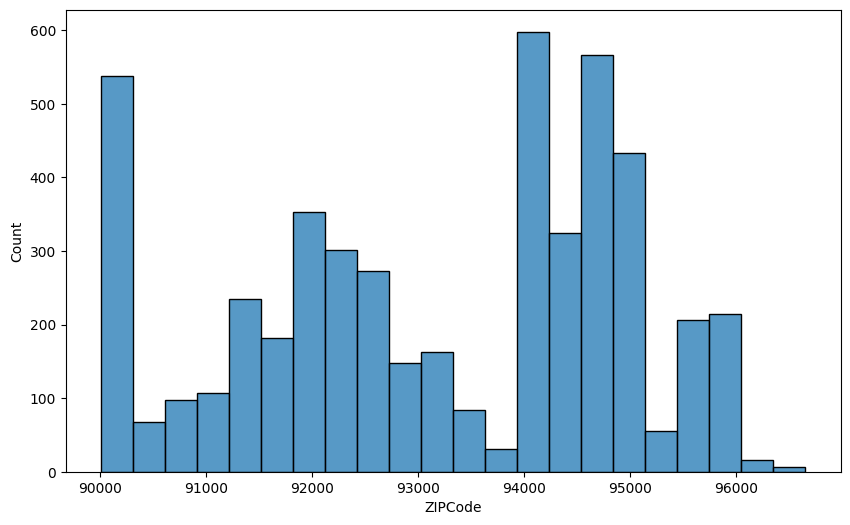

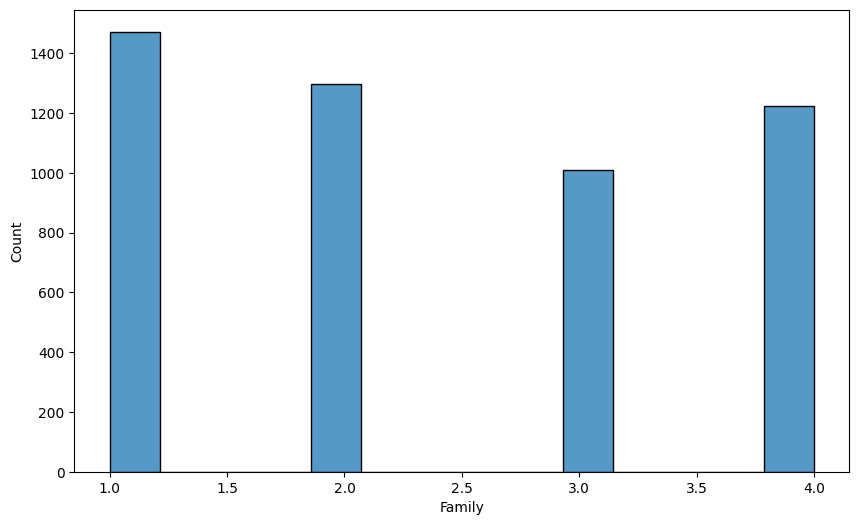

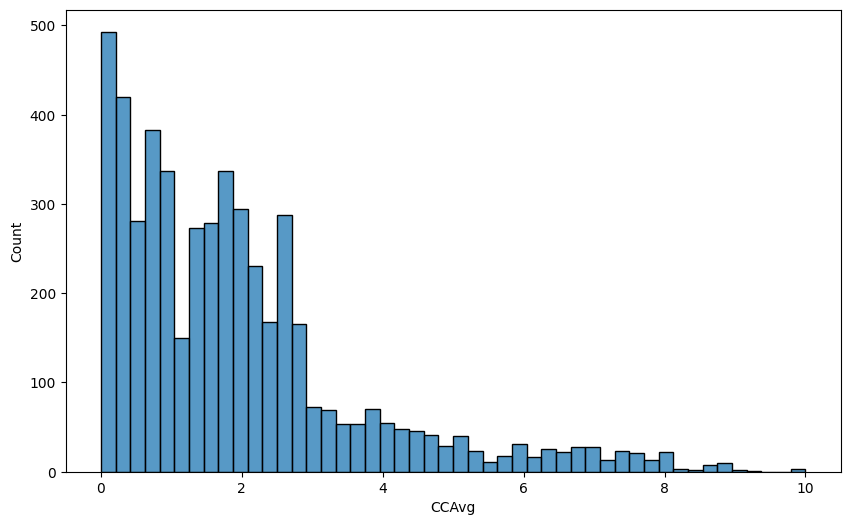

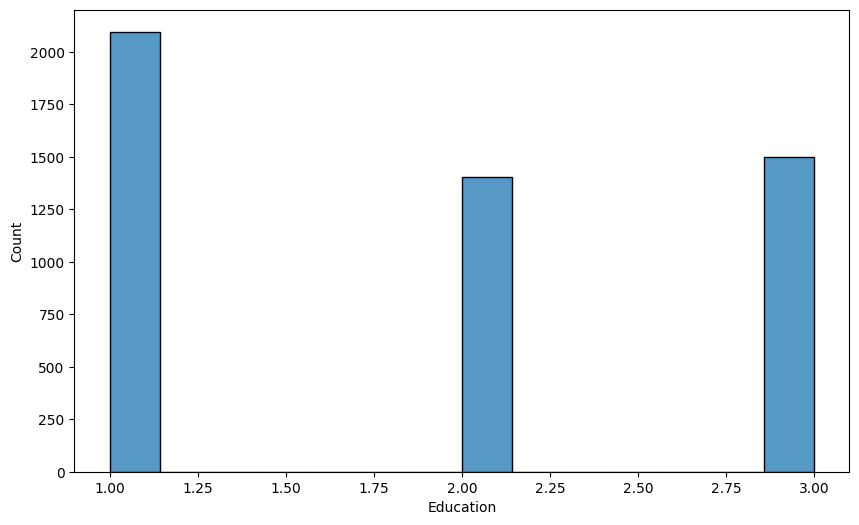

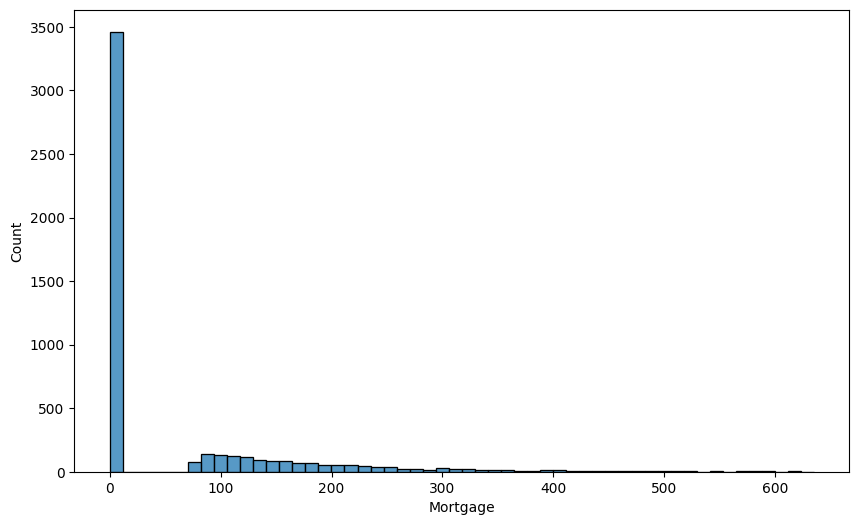

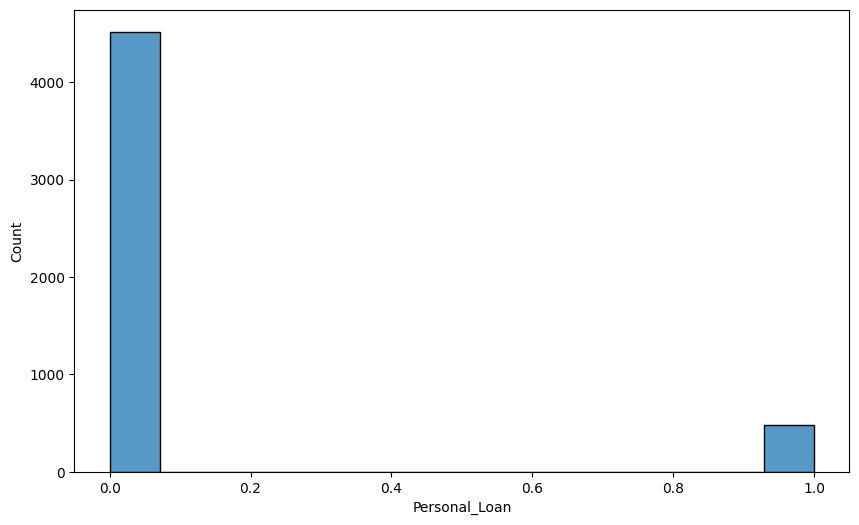

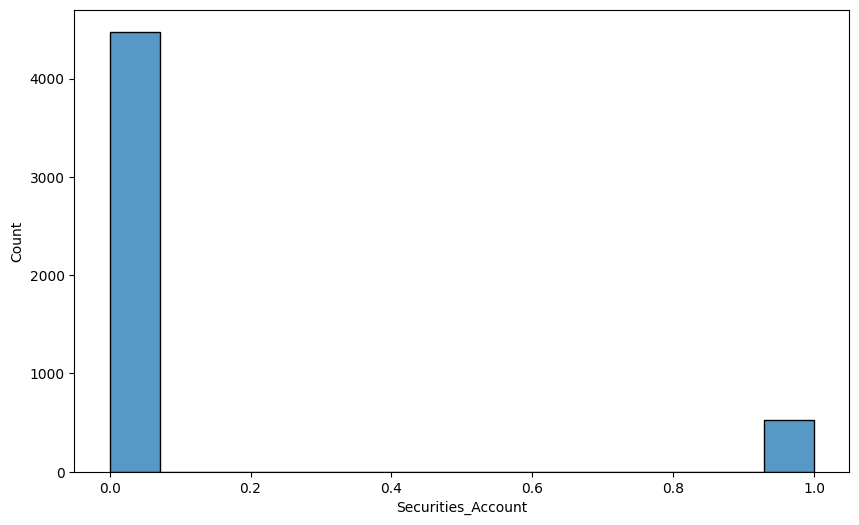

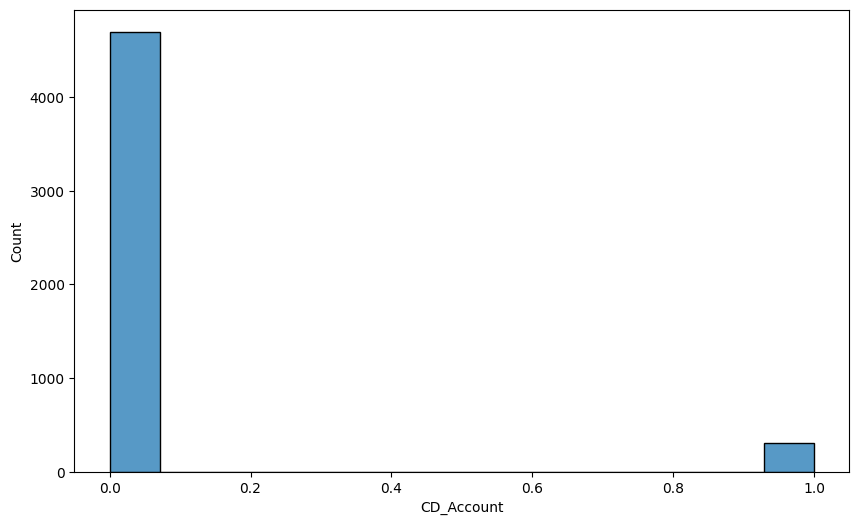

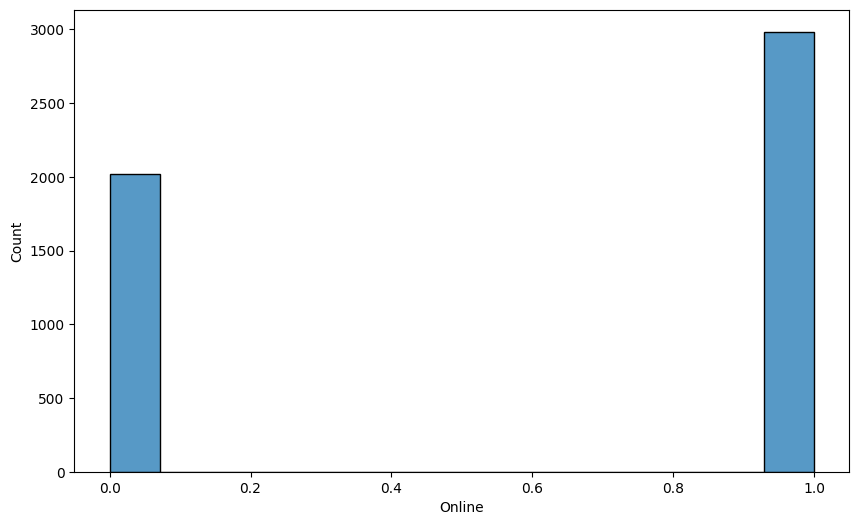

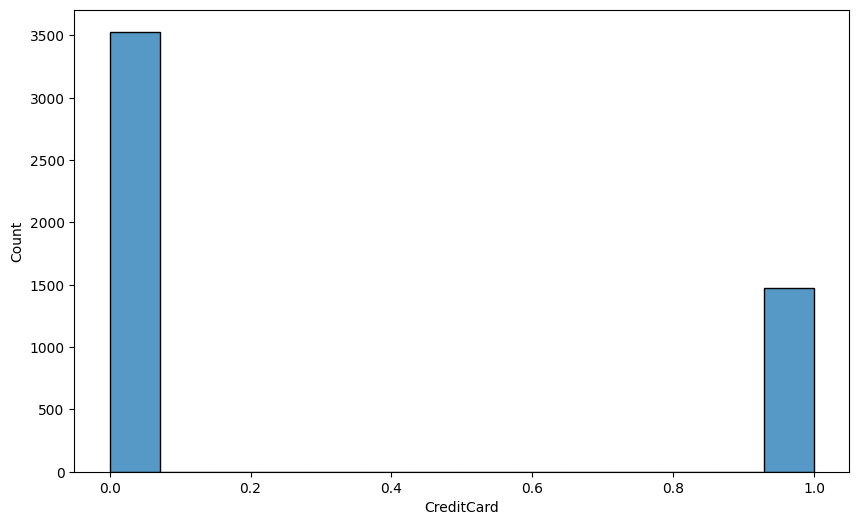

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col])
    plt.show()

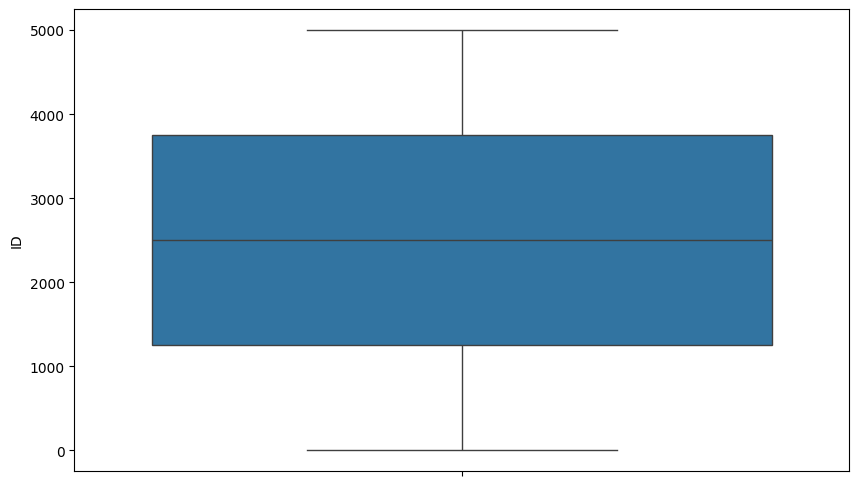

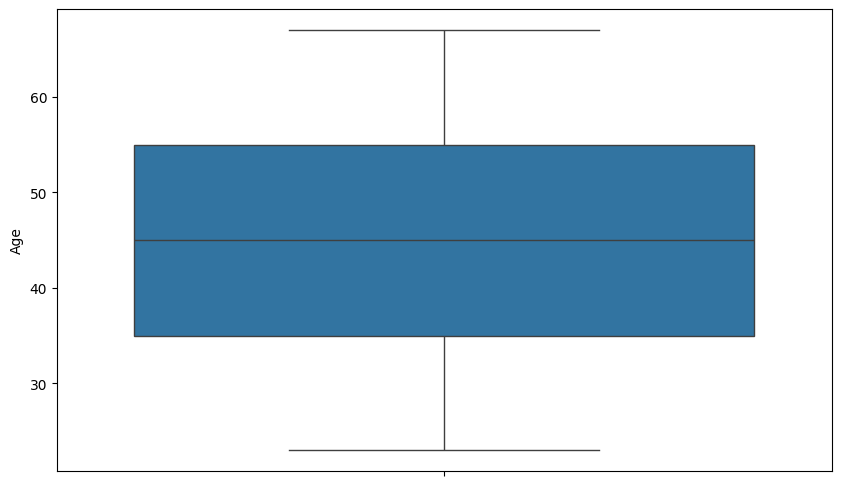

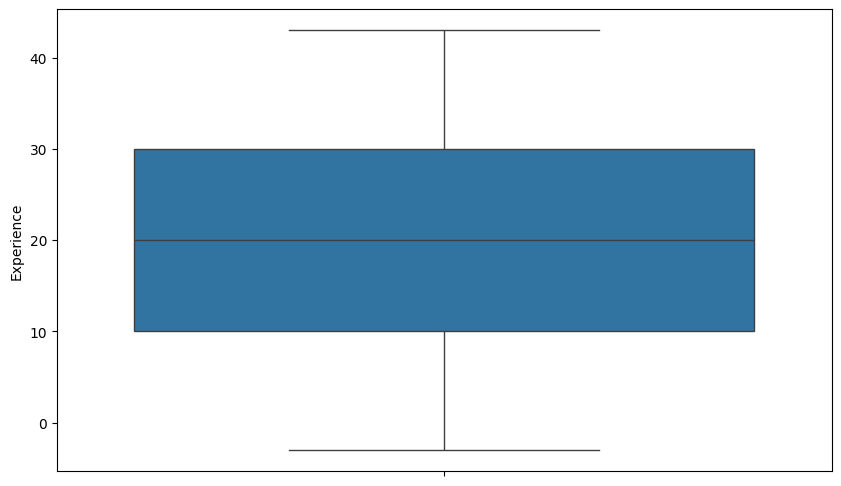

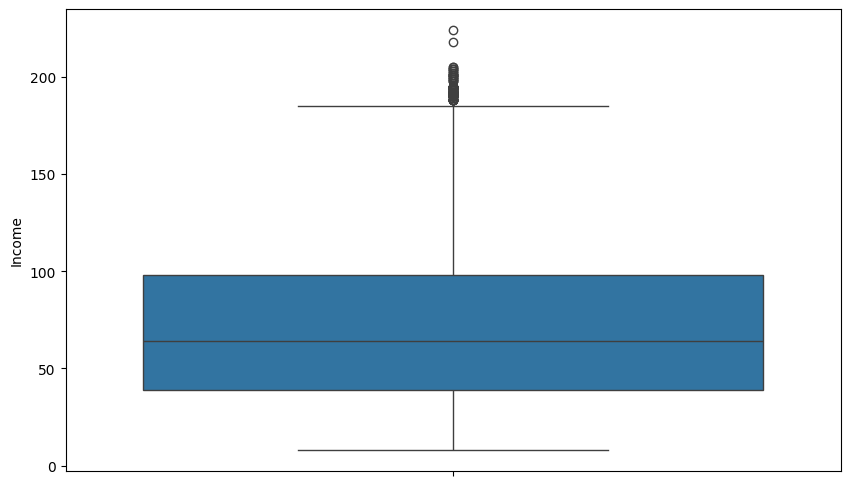

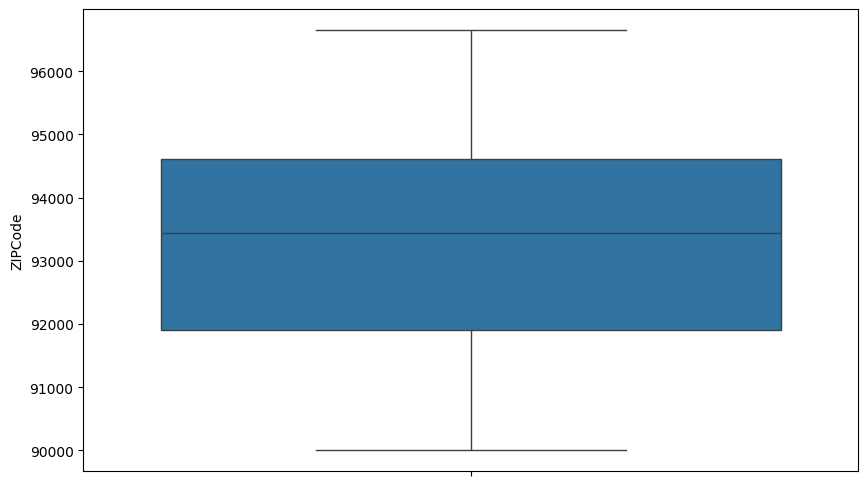

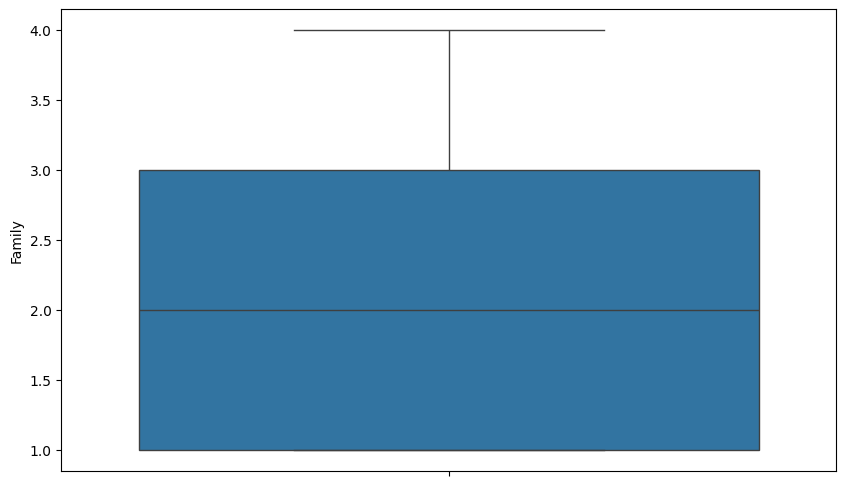

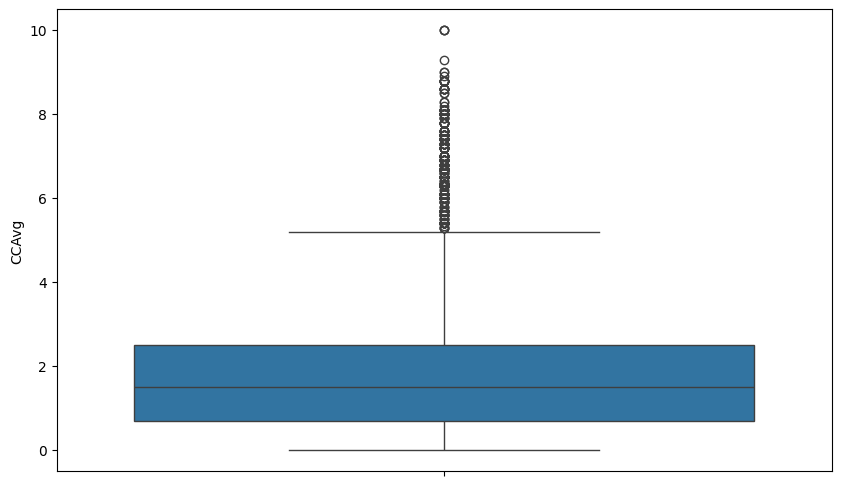

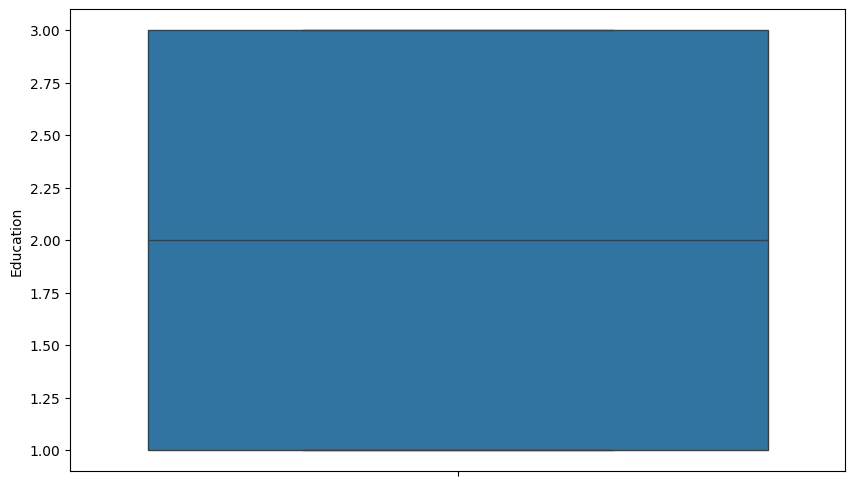

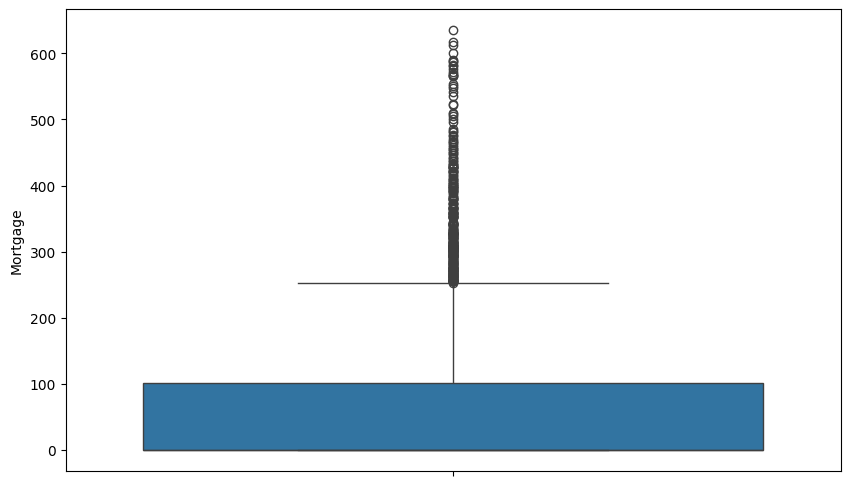

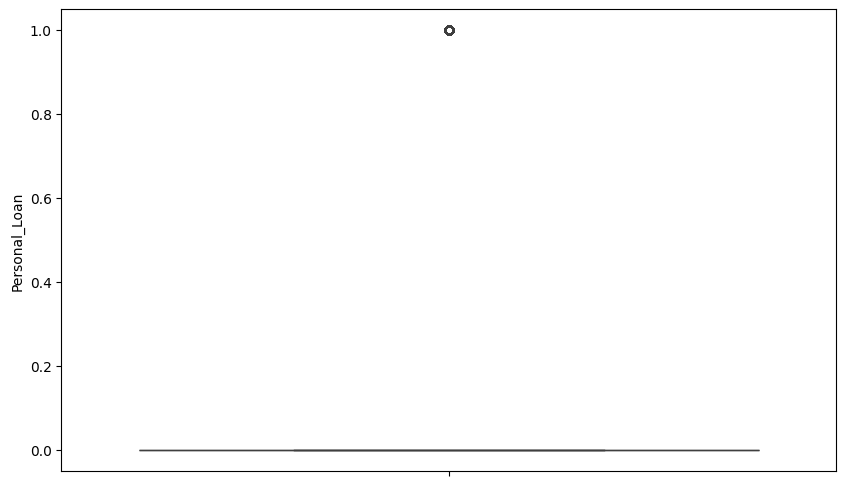

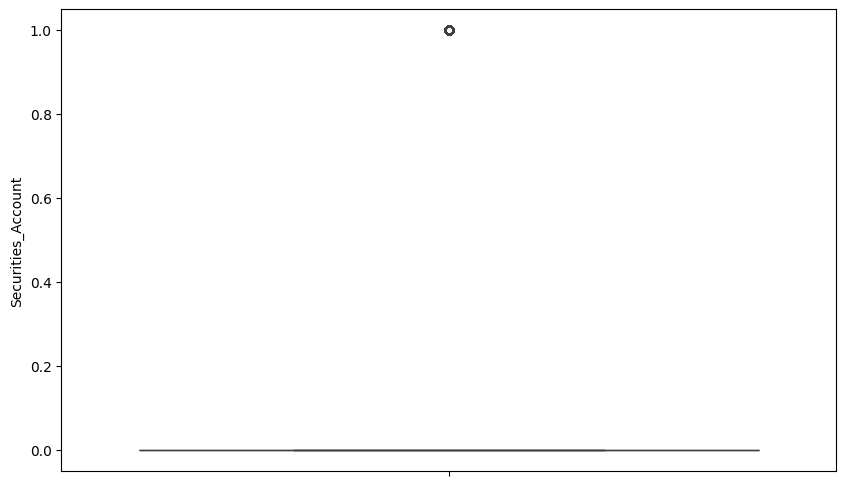

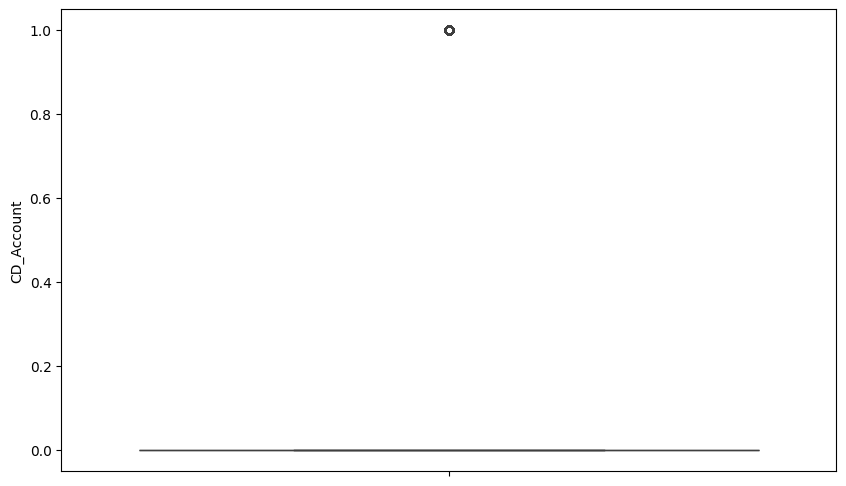

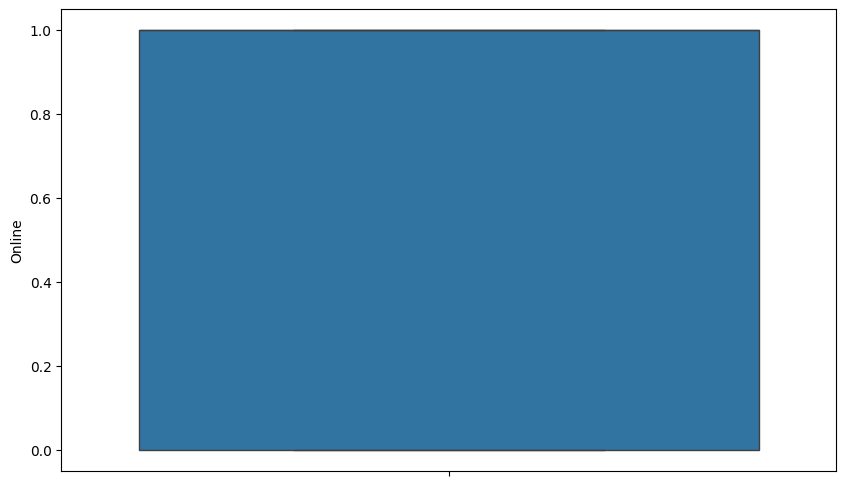

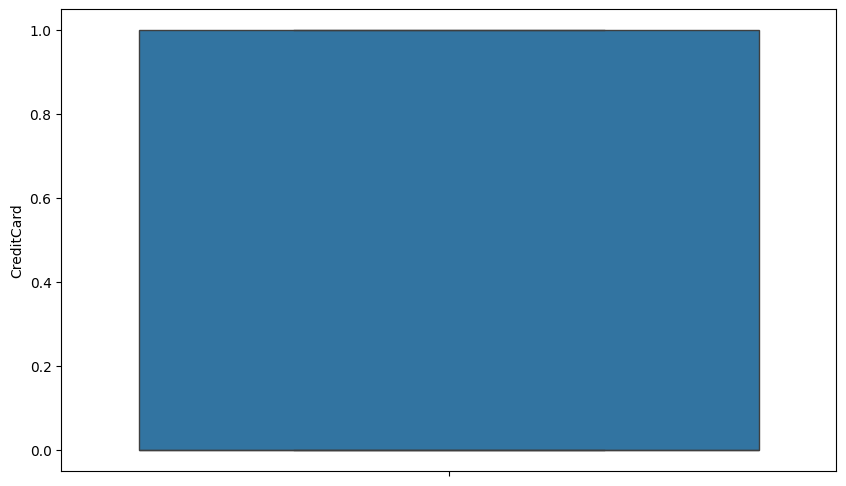

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[col])
    plt.show()

> ID: ID is a completely uniform distribution which makes sense since it's sequential

> Age: The distribution for age is approximately symmetric with multiple peaks and multiple troughs

> Experience: The distribution for experience is mostly symmetric, but there is a slightly higher frequency of values above 20 years than below 20 years. Seeing the statistics, the mean experience (20.1046 years) is slightly higher than the median of 20 years

> Income: The distribution of income is right-skewed with many high values and plenty of medium and low values. This is very likely in financial scenarios where some people are much richer than the rest of the population

> ZIP Code: The distribution of ZIP Code is not symmetric or skewed in one direction, but rather the frequencies vary a lot with the value ranges. This is likely because different zip codes have different numbers of residents due to geographical reasons.

> Family: There are plenty of customers with each of the recorded family sizes (being 1 to 4), but in terms of frequencies, family size 1 is somewhat more common than size 2 which is very slightly common than size 4 which is somewhat more common than size 3

> CCAvg: The distribution of CCAvg is right-skewed with many high values. This makes sense for the same reasons the right-skewness of income makes sense, and it would make sense that the high income customers are the ones with high CCAvg

> Education: In terms of frequencies, level 1 is significantly more common than level 3 which is slightly more common than level 2

> Mortgage: The distribution of mortgage is highly right-skewed, with customers having a mortgage of 0 or very close to 0 and a few customers have significant mortgage values.

> Personal_Loan: Most people (eyeballing it, I'd say around 90%) did not accept the personal loan offered in the last campaign where some did

> Securities_Account: Most people (eyeballing it, I'd say around 90%) do not have a securities account with the bank whereas some do

> CD_Account: Most customers (eyeballing it, I'd say 90-95%) do not have a CD account with the bank whereas some do

> Online: Plenty of customers do NOT use Internet banking facilities whereas a slight but noticeable majority of them do

> CreditCard: Most customers (eyeballing it, I'd say around 70%) do not use a credit card issued by any other bank but the rest do

In [ ]:
print(f"Number of customers with 0 mortgage: {(data['Mortgage'] == 0).sum()}")
print(f"Number of customers with credit cards not issued by All Life Bank: {(data['CreditCard'] == 1).sum()}")

Number of customers with 0 mortgage: 3462
Number of customers with credit cards not issued by All Life Bank: 1470


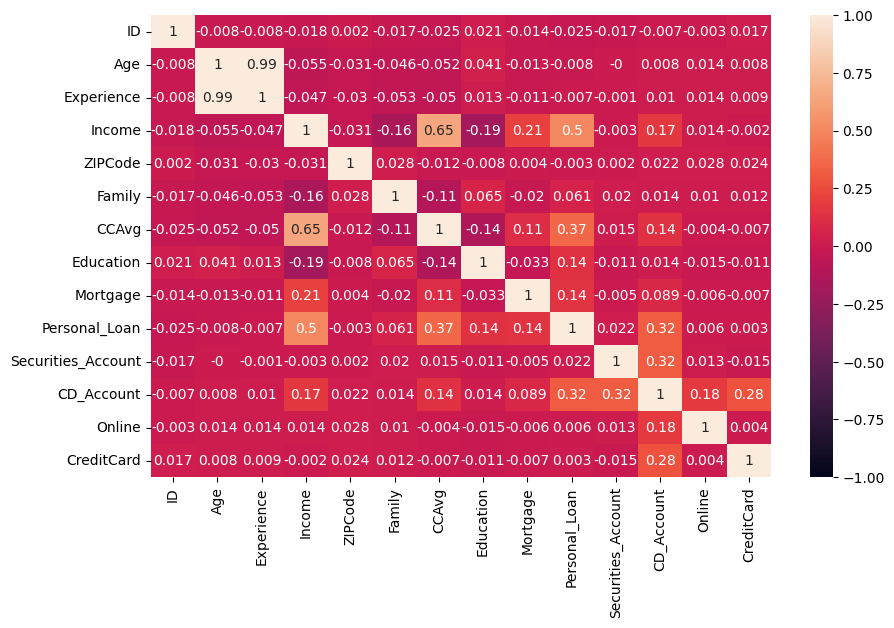

In [ ]:
# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr().round(3), annot=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

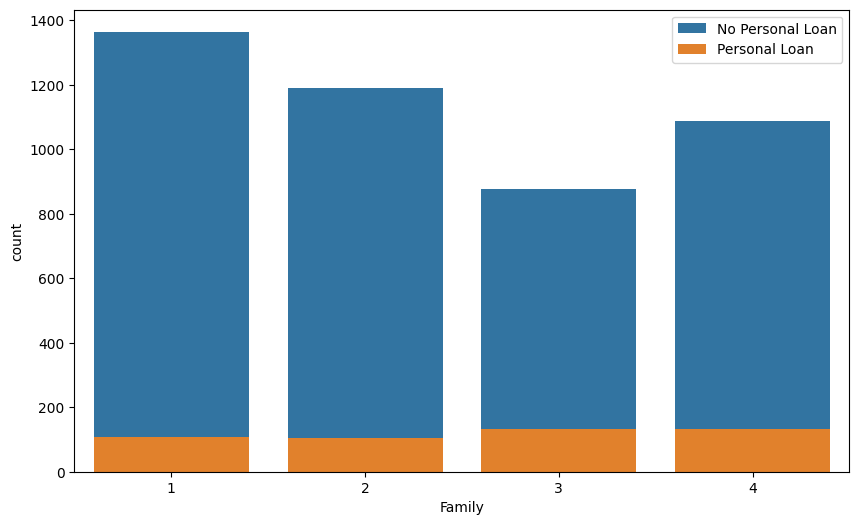

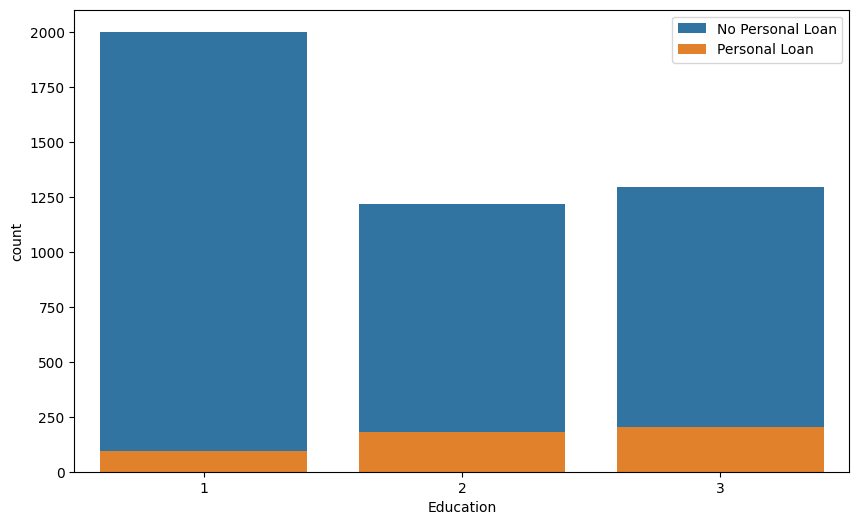

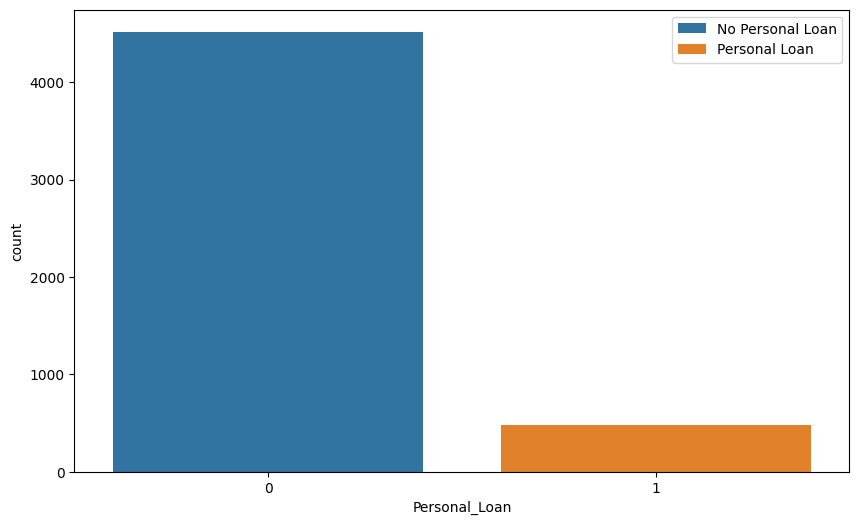

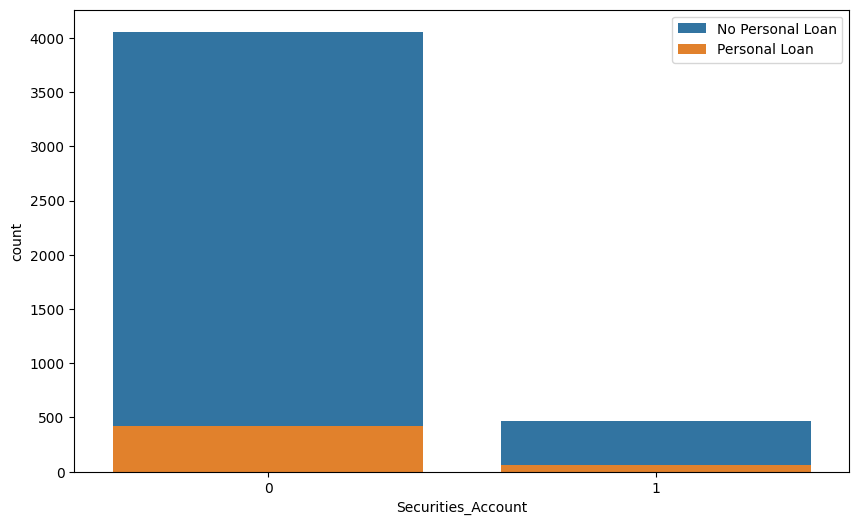

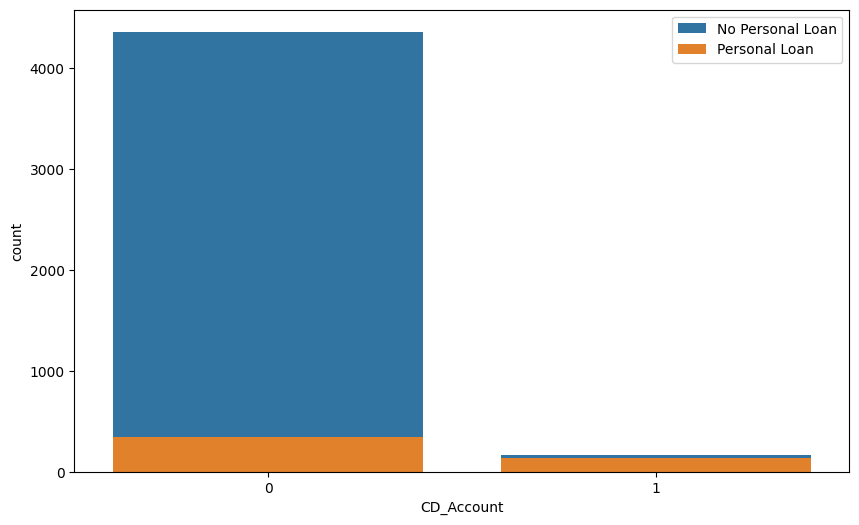

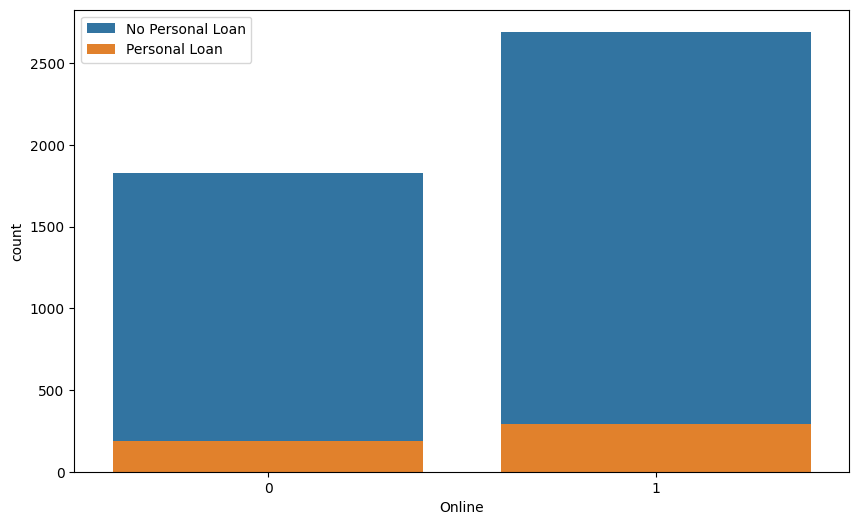

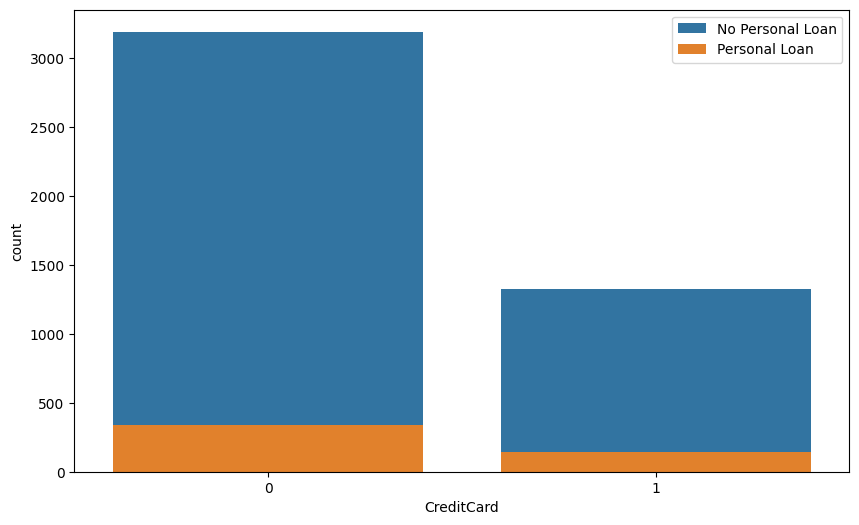

In [ ]:
discrete_numerical_variables = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
no_personal_loan_data = data[data['Personal_Loan'] == 0]
personal_loan_data = data[data['Personal_Loan'] == 1]
for col in discrete_numerical_variables:
    plt.figure(figsize=(10, 6))
    # plot personal_loan frequency versus the values of these variables
    sns.countplot(x=col, data=no_personal_loan_data)
    sns.countplot(x=col, data=personal_loan_data)
    plt.legend(['No Personal Loan', 'Personal Loan'])
    plt.show()

> Most personal loans come from people without securities accounts and people without credit cards not issued by All Life Bank

> Slightly more personal loans come from education = 2 or 3 years than 1 year, customers that use Internet banking facilities, customers without CD account

> Family=3 has slightly more relative frequency for personal loans versus family=1, 2, or 4

> Age is extremely-highly positively correlated to experience

> Income is strongly positively correlated to CCAvg and significantly positively correlated to Personal_Loan

> Personal_Loan is notably positively correlated to CCAvg and CD_Account

> Securities_Account is notably positively correlated to CD_Account

> CD_Account is notably positively correlated to Personal_Loan, Securities_Account, and CreditCard

> CreditCard is notably positively correlated to CD_Account

------- From the pairplot -----

> Mortgage is notably positively correlated to income whenever mortgage is not 0

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


> No missing values

In [ ]:
# Drop the ID column as it is just an identifier
# Here, we don't need to copy the data as before this line of code, 'data' is just the same as 'original_data' (IE we didn't modify it already)
data = data.drop('ID', axis=1)

In [ ]:
# Scaling continuous numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous_numerical_variables = ['Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg',  'Mortgage']
data[continuous_numerical_variables] = scaler.fit_transform(data[continuous_numerical_variables])

In [ ]:
print(data[continuous_numerical_variables].mean())
print(data[continuous_numerical_variables].std())
# Here, we know the data is z-score scaled

Age          -2.131628e-18
Experience   -1.179501e-16
Income        1.449507e-16
ZIPCode       1.260148e-15
CCAvg        -6.394885e-17
Mortgage     -5.613288e-17
dtype: float64
Age           1.0001
Experience    1.0001
Income        1.0001
ZIPCode       1.0001
CCAvg         1.0001
Mortgage      1.0001
dtype: float64


In [ ]:
print(data[continuous_numerical_variables].min())
print(data[continuous_numerical_variables].max())

Age          -1.948906
Experience   -2.014911
Income       -1.428969
ZIPCode      -1.798610
CCAvg        -1.108987
Mortgage     -0.555524
dtype: float64
Age           1.889859
Experience    1.996667
Income        3.263712
ZIPCode       1.979074
CCAvg         4.613525
Mortgage      5.688108
dtype: float64


In [ ]:
# One-hot encoding on discrete numerical variables, in order to prevent the model from treating these as continuous variables
from sklearn.preprocessing import OneHotEncoder
discrete_numerical_variables = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
# Yes education is an integer variable since it is of type int64
print(f"Data shape before encoding: {data.shape}")
data = pd.get_dummies(data, columns=discrete_numerical_variables)
print(f"Data shape after encoding: {data.shape}")

Data shape before encoding: (5000, 13)
Data shape after encoding: (5000, 22)


In [ ]:
print((data['Mortgage'] >= 3).sum())
print((data['Mortgage']>=4).sum())
print((data['Mortgage']>=4.5).sum())
print((data['Mortgage']>=5).sum())
print((data['Mortgage']>=6).sum())

105
36
22
13
0


In [ ]:
print((data['CCAvg'] >= 3).sum())
print((data['CCAvg']>=4).sum())
print((data['CCAvg']>=4.5).sum())

121
6
3


In [ ]:
# Filter out rows where Mortgage >= 5 (after scaling), as this is 36/5K rows and could affect model-building
print(f"Data shape before outlier removal: {data.shape}")
data = data[data['Mortgage'] <= 5]
# Only 6 of the 5K rows have CCAvg >= 4, so remove those
data = data[data['CCAvg'] <= 4]
print(f"Data shape after outlier removal: {data.shape}")

Data shape before outlier removal: (5000, 22)
Data shape after outlier removal: (4981, 22)


In [ ]:
from sklearn.model_selection import train_test_split
RS = 42
train_data, test_data = train_test_split(data, test_size=0.2, random_state=RS)
# I am choosing test size = 0.2 as we will have plenty of testing data in that case, since we have approixmately 5K rows
X_train = train_data.drop('Personal_Loan', axis=1)
y_train = train_data['Personal_Loan']
X_test = test_data.drop('Personal_Loan', axis=1)
y_test = test_data['Personal_Loan']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3984, 21)
(3984,)
(997, 21)
(997,)


## Model Building

### Model Evaluation Criterion

> Here, it seems that false negatives are worse than false positives, as false negatives mean we don't reach out to people who would accept the loan, whereas false positives mean we reach out to people who won't accept the loan. The first case yields more profit loss for our bank

> As such, we will prioritize minimizing false negatives, IE maximizing our recall


### Model Building

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
def get_classification_metrics(y_true, y_pred, round_value=2):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.{round_value}f}")
    print(f"Precision: {precision:.{round_value}f}")
    print(f"Recall: {recall:.{round_value}f}")
    return [accuracy, precision, recall]

#### Decision Tree (no pruning, pre-pruning and post-pruning)

> As this is a classification problem, I will focus on using SkLearn's classifiers

> For decision trees, I do not want overfitting, so I will focus on using them with pre-pruning and post-pruning

##### No Pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_no_pruning = DecisionTreeClassifier(random_state=RS)
decision_tree_no_pruning.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_train_pred = decision_tree_no_pruning.predict(X_train)
y_test_pred = decision_tree_no_pruning.predict(X_test)
print('Training set\n')
get_classification_metrics(y_train, y_train_pred);
print('\nTest set\n')
get_classification_metrics(y_test, y_test_pred);
# the ; at the end so it doesn't print things we don't want it to

Training set

Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Test set

Accuracy: 0.98
Precision: 0.93
Recall: 0.88


> Here, the decision tree is great on the testing data as well, but given it's perfect on the training data, it's likely there is some overfitting that indicates we could improve on the testing data

> Let us try with pre-pruning and post-pruning

##### Pre-pruning

In [ ]:
# Pre-pruning
max_depth_values = [5, 6, 7, 8, 9, 10]
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = [5, 7, 10, 12, 15]
best_model = None
best_recall = 0
for max_depth in max_depth_values:
  for max_leaf_nodes in max_leaf_nodes_values:
    for min_samples_split in min_samples_split_values:
        model = DecisionTreeClassifier(random_state=RS, max_depth=max_depth, min_samples_split=min_samples_split)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        print(f"max_depth: {max_depth}, max_leaf_nodes: {max_leaf_nodes}, min_samples_split: {min_samples_split}")
        [accuracy, precision, recall] = get_classification_metrics(y_test, y_test_pred)
        print('\n')
        if recall > best_recall:
            best_recall = recall
            best_model = model
        print('\n')

max_depth: 5, max_leaf_nodes: 10, min_samples_split: 5
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 10, min_samples_split: 7
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 10, min_samples_split: 10
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 10, min_samples_split: 12
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 10, min_samples_split: 15
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 20, min_samples_split: 5
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 20, min_samples_split: 7
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 20, min_samples_split: 10
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 20, min_samples_split: 12
Accuracy: 0.98
Precision: 0.92
Recall: 0.88




max_depth: 5, max_leaf_nodes: 20, min_samples_split: 15
Accuracy: 0.

> Here, the best model was with max_depth = 7 and min_samples_split = 5 or 7
> this was not only the best in recall with an accuracy of 0.90 but it was also tied for the best in accuracy of 0.98 and had a 2nd-best precision of 0.94

In [ ]:
print(best_model.get_depth())
print(best_model.get_n_leaves())
print(best_model.get_params()['min_samples_split'])

7
34
5


In [ ]:
decision_tree_pre_pruning = best_model
y_test_pred = decision_tree_pre_pruning.predict(X_test)
get_classification_metrics(y_test, y_test_pred, round_value=5)

Accuracy: 0.98295
Precision: 0.94118
Recall: 0.89720


[0.9829488465396189, 0.9411764705882353, 0.897196261682243]

##### Post-pruning

> The first few cells are copied directly from the hands on decision tree notebook

>

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=RS)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000158,0.000474
2,0.000165,0.000969
3,0.000235,0.001440
4,0.000241,0.001922
5,0.000242,0.002406
6,0.000314,0.003347
7,0.000321,0.004310
8,0.000335,0.004645
9,0.000335,0.004980


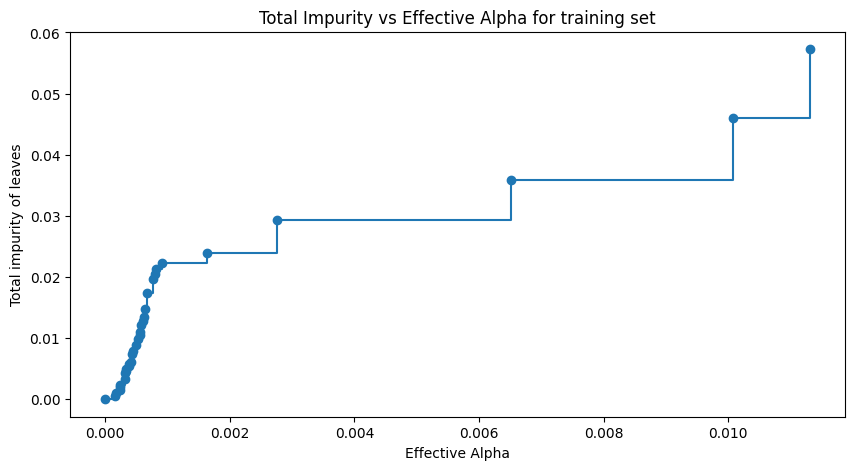

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [ ]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=RS)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.05274088956852021


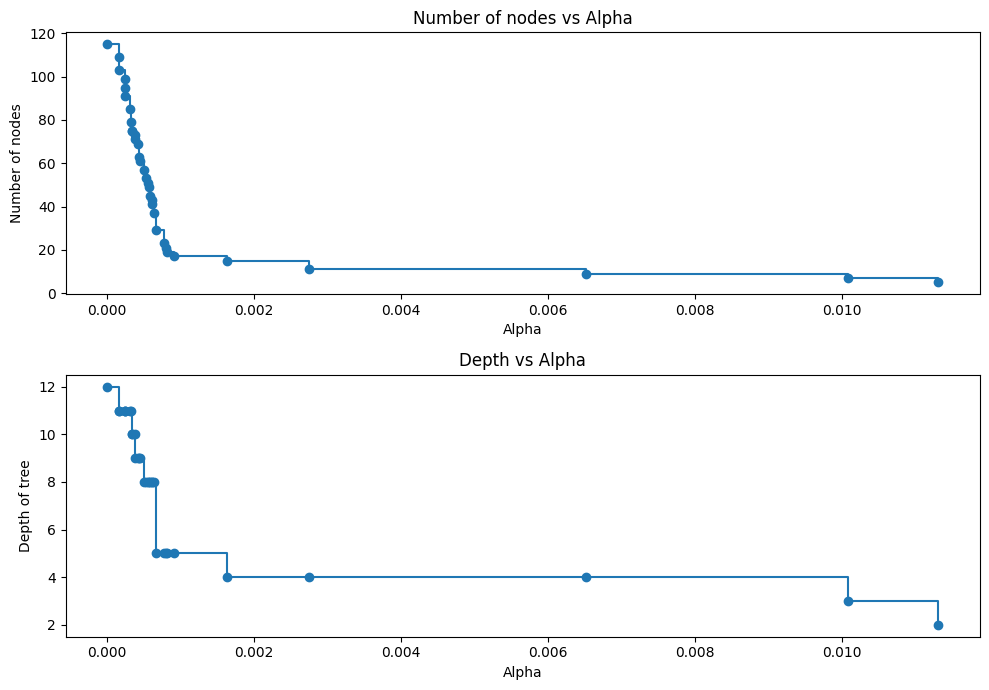

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [ ]:
train_recall_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    y_train_pred = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    train_recall = recall_score(y_train, y_train_pred)

    # Append the calculated F1 score to the train_f1_scores list
    train_recall_scores.append(train_recall)

In [ ]:
test_recall_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    y_test_pred = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    test_recall = recall_score(y_test, y_test_pred)

    # Append the calculated F1 score to the test_f1_scores list
    test_recall_scores.append(test_recall)


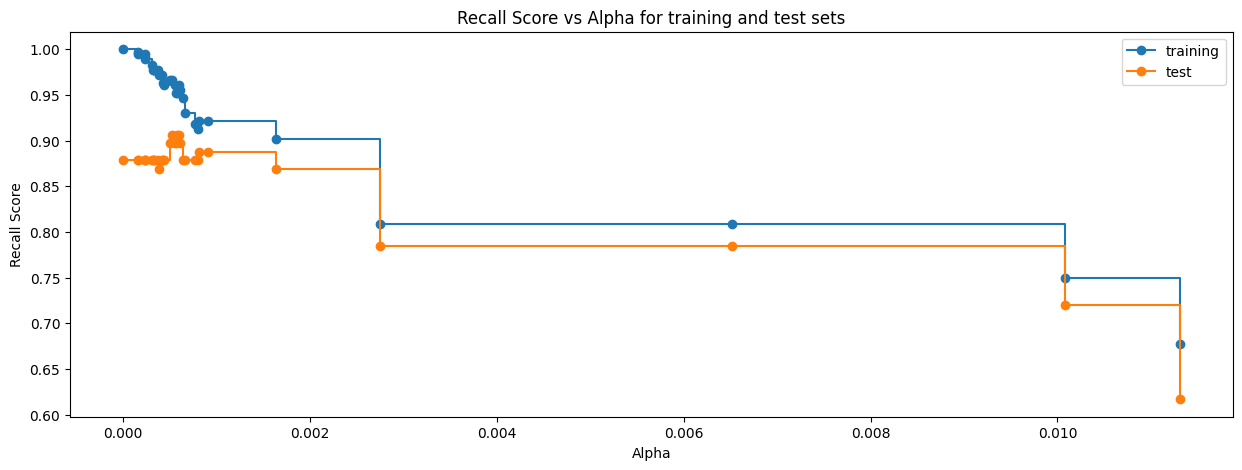

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("Recall Score")  # Set the label for the y-axis
ax.set_title("Recall Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_recall_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_recall_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
index_of_best_recall_score = np.argmax(test_recall_scores)
best_model = clfs[index_of_best_recall_score]
print(f"The best model has an alpha of {ccp_alphas[index_of_best_recall_score]}")
y_test_pred = best_model.predict(X_test)
get_classification_metrics(y_test, y_test_pred, round_value=5)

The best model has an alpha of 0.0005271084337349398
Accuracy: 0.98395
Precision: 0.94175
Recall: 0.90654


[0.9839518555667001, 0.941747572815534, 0.9065420560747663]

In [ ]:
# Make sure the model performs well on the training set
y_train_pred = best_model.predict(X_train)
get_classification_metrics(y_train, y_train_pred, round_value=5)

Accuracy: 0.99398
Precision: 0.96629
Recall: 0.96629


[0.9939759036144579, 0.9662921348314607, 0.9662921348314607]

> Indeed, the model still performs amazingly on the training data

In [ ]:
print(f"depth: {best_model.get_depth()}")
print(f"number of leaves: {best_model.get_n_leaves()}")
print(f"number of nodes: {best_model.tree_.node_count}")
print(f"min samples per split: {best_model.get_params()['min_samples_split']}")
# Impurity
print(f"impurity: {best_model.tree_.impurity[index_of_best_recall_score]}")

depth: 8
number of leaves: 27
number of nodes: 53
min samples per split: 2
impurity: 0.18000000000000005


> Indeed, the best classifier's alpha is similar to the alpha that gives the best recall score in the recall vs alpha plot for the test set. It also our model's number of nodes in the no. nodes versus alpha plot, the depth in the depth vs alpha plot, and the impurity in the impurity vs effective alpha plot

In [ ]:
decision_tree_post_pruning = best_model

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

> I already showed the model performances in the Model Building section, but I'll show them here one more time for organization purposes

In [ ]:
print("No pruning train")
y_test_pred = decision_tree_no_pruning.predict(X_test)
get_classification_metrics(y_test, y_test_pred, round_value=5);

print("\nPre-pruning")
y_test_pred = decision_tree_pre_pruning.predict(X_test)
get_classification_metrics(y_test, y_test_pred, round_value=5);

print("\nPost-pruning")
y_test_pred = decision_tree_post_pruning.predict(X_test)
get_classification_metrics(y_test, y_test_pred, round_value=5);

No pruning train
Accuracy: 0.97994
Precision: 0.93069
Recall: 0.87850

Pre-pruning
Accuracy: 0.98295
Precision: 0.94118
Recall: 0.89720

Post-pruning
Accuracy: 0.98395
Precision: 0.94175
Recall: 0.90654


> Again, we were after minimizing recall, as the cost of not calling customers who would interested in the personal loan was more than the cost of calling customers who wouldn't be interested in the personal

> As such, the post-pruning model was the best for our criteria, while still maintaining a high accuracy and precision (in fact, this model has the best accuracy and precision as well)

In [ ]:
chosen_model = decision_tree_post_pruning

## Explaining the model

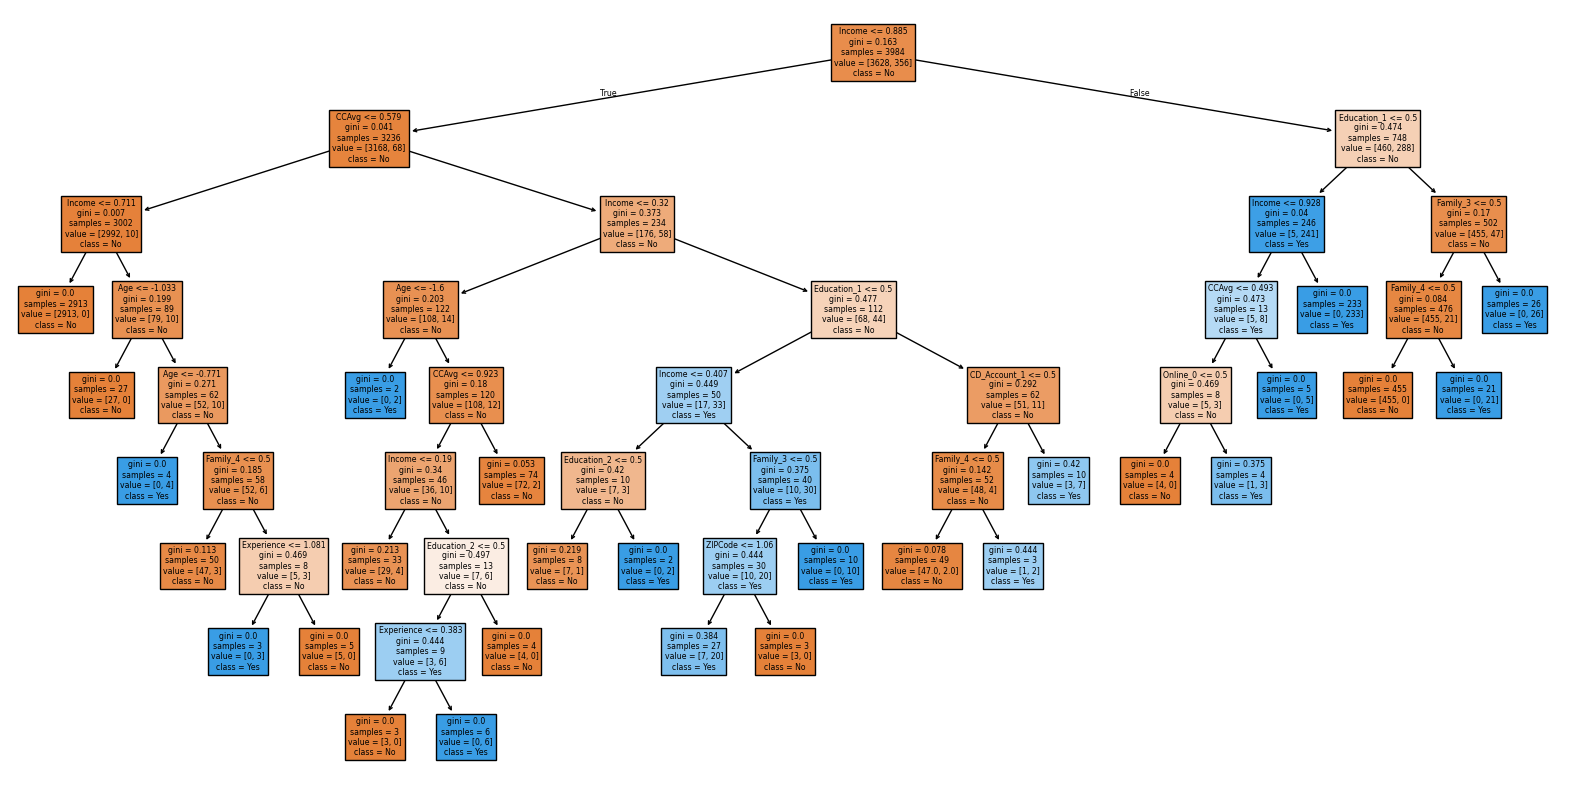

In [ ]:
# Visualize the decision tree chosen_model
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(chosen_model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True);

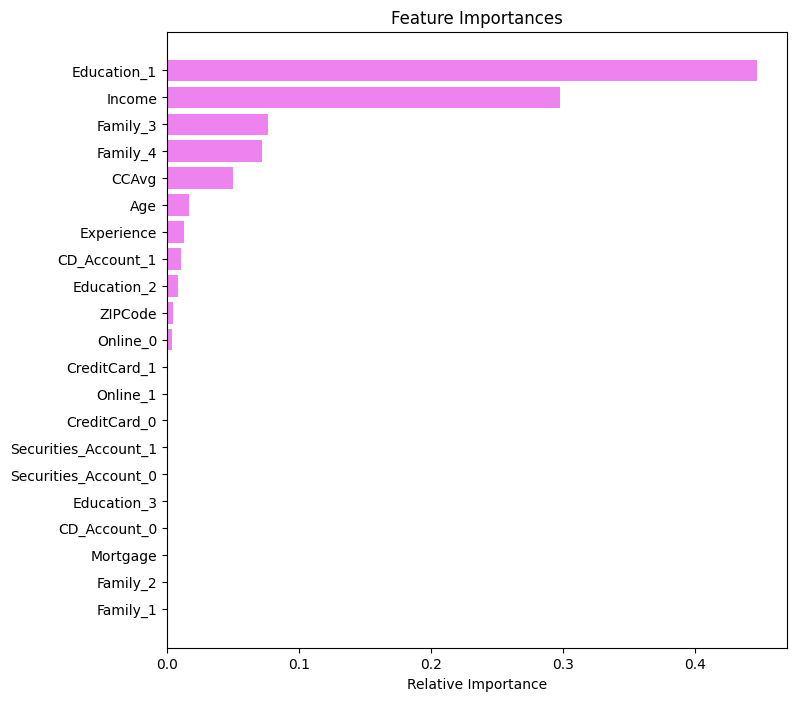

In [ ]:
# importance of features in the tree building
importances = chosen_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

> In this decision tree, the most important features are education being undergrad, income, family size being 3 or 4, and CCAvg

> We can neglect the features of mortgage, having or not having a credit card issued outside the bank, having or not having securities accounts, family size being 1 or 2, education being advanced/professional, not having a CD account with the bank, and customers who do in fact use online banking facilities, as well as potentially customers who do not use online banking facilities

## Actionable Insights and Business Recommendations


- The bank can deploy this model to see if customers are interested in the personal loan or not. For those that would be interested in the personal loan, the bank would be able to correctly identify about 91% of them

- Instead of outputting an accept or decline prediction, the model can be made to output the likelihood of a customer accepting the loan. We can then prioritize first contacting customers who are more likely to accept the loan and then those who are less likely to accept it.

___